In [8]:
import torch
import numpy as np

from matplotlib import pyplot as plt
from time import time

from model import Model


In [9]:
def display_rgb(img):
    plt.imshow(img.permute(1,2,0))
    plt.show()

def psnr_eval(model, noised, ground_truth):
    def psnr(denoised, ground_truth):
        mse = torch.mean((denoised.cpu() - ground_truth.cpu()) ** 2)
        return -10 * torch.log10(mse + 10 ** -8)

    noised = noised.float()
    ground_truth = ground_truth.float()

    denoised = model.predict(noised) / 255

    psnr_result = psnr(denoised, (ground_truth / 255)).item()
    print(f'PSNR result: {psnr_result}dB')

    nb_images = 3
    must_randomize = True

    f, axarr = plt.subplots(nb_images, 3)

    if must_randomize:
        nb_index = np.random.choice(len(noised), nb_images)
    else:
        nb_index = np.arange(nb_images)
    axarr[0, 0].set_title("Noisy Images")
    axarr[0, 1].set_title("Denoised")
    axarr[0, 2].set_title("Ground Truth")

    for i, index in enumerate(nb_index):
        axarr[i, 0].imshow(clean_imgs[index].permute(1,2,0))
        axarr[i,0].get_yaxis().set_visible(False)
        axarr[i,0].get_xaxis().set_visible(False)
        axarr[i, 1].imshow(denoised[index].cpu().detach().permute(1,2,0))
        axarr[i, 1].get_yaxis().set_visible(False)
        axarr[i, 1].get_xaxis().set_visible(False)
        axarr[i, 2].imshow(clean_imgs[index].permute(1,2,0))
        axarr[i, 2].get_yaxis().set_visible(False)
        axarr[i, 2].get_xaxis().set_visible(False)
    plt.show()

In [10]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f'The model will be loaded on the {"GPU" if device == "cuda" else "cpu"}.')

noisy_imgs_1, noisy_imgs_2 = torch.load('train_data.pkl')
noisy_imgs, clean_imgs = torch.load('val_data.pkl')

The model will be loaded on the GPU.


In [4]:
model = Model()

In [12]:
model.train(noisy_imgs_1, noisy_imgs_2, 5)

EPOCH: 1/5


Epoch [0/5]: 100%|██████████| 6250/6250 [01:52<00:00, 55.34it/s, loss=0.0158]


EPOCH: 2/5


Epoch [1/5]: 100%|██████████| 6250/6250 [01:42<00:00, 61.10it/s, loss=0.0157]


EPOCH: 3/5


Epoch [2/5]: 100%|██████████| 6250/6250 [01:41<00:00, 61.30it/s, loss=0.0156]


EPOCH: 4/5


Epoch [3/5]: 100%|██████████| 6250/6250 [01:47<00:00, 58.16it/s, loss=0.0156]


EPOCH: 5/5


Epoch [4/5]: 100%|██████████| 6250/6250 [01:43<00:00, 60.10it/s, loss=0.0156]


PSNR result: 23.35552406311035dB


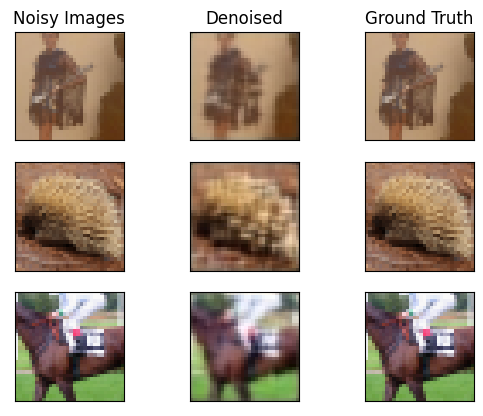

In [13]:
psnr_eval(model, noisy_imgs, clean_imgs)

In [11]:
model.save("model.pth")

In [14]:
noisy_imgs_1.shape

torch.Size([50000, 3, 32, 32])